In [ ]:
import numpy as np

test = np.random.uniform(-100, 51, 100)

#print(test)

test_normal = np.random.normal(10, 5, 100)

#print(test_normal)

test_expo = np.random.exponential(0.5, 100)

#print(test_expo)


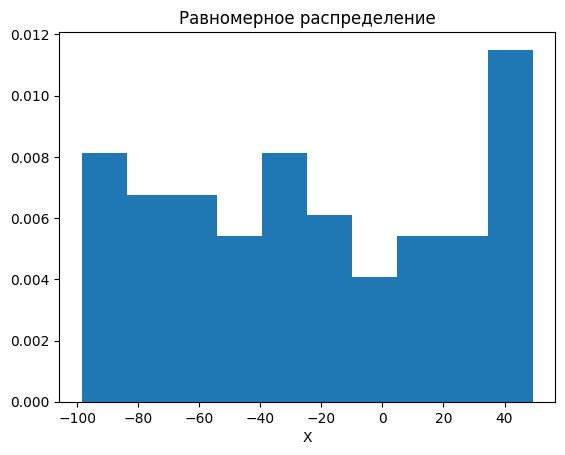

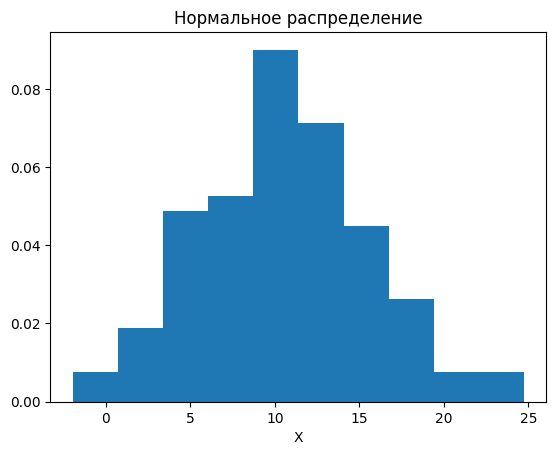

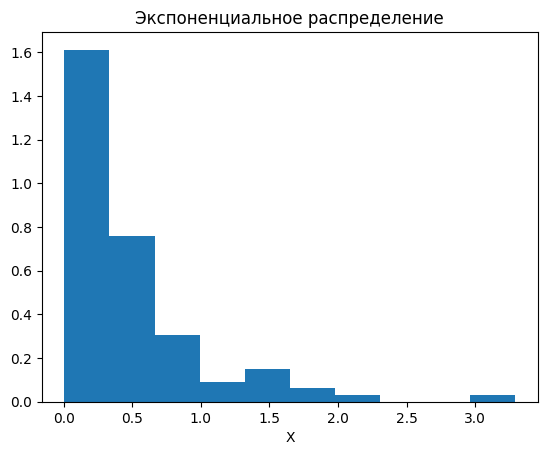

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(test, density=True)
plt.xlabel('Х')
plt.title('Равномерное распределение')
plt.show()

plt.hist(test_normal, density=True)
plt.xlabel('Х')
plt.title('Нормальное распределение')
plt.show()

plt.hist(test_expo, density=True)
plt.xlabel('Х')
plt.title('Экспоненциальное распределение')
plt.show()


In [ ]:
mean_expo = np.mean(test_expo)
std_expo = np.std(test_expo)
z_expo = (test_expo - mean_expo) / std_expo

print(z_expo)


[ 2.95667678 -0.04814468  0.58215921 -0.30043129  0.23190639 -0.49047449
  2.43369278 -0.85368949 -0.79294899 -0.88019212 -0.46252685 -0.43586785
 -0.08132514 -0.71975328 -0.61154067 -0.35570155  1.65017281  0.78305891
  0.21297546  0.1184203   0.04193175 -0.90206686 -0.87810463  2.17502309
 -0.4179644  -0.3436355  -0.45986415 -0.82847906 -0.28283805  0.36567527
  1.05394098  1.15583247 -0.37387947  0.31142681  2.50490788 -0.82471277
  0.54659678 -0.6106699  -0.54035239 -0.54193354 -0.18682491 -0.53601225
  0.26213467 -0.10407148 -0.89941735  0.28008584  1.91341375 -0.75825863
 -0.88771887 -0.60061855 -0.31600855 -0.64828486 -0.28691873 -0.31312956
  0.11890539  1.64644226 -0.64375398 -0.71159046 -0.71600475  1.12186663
 -0.83992093 -0.77984652  2.06469551 -0.66656997  0.72426168  0.12743993
 -0.60991986  0.61703696  0.97808975  0.77801976 -0.01000055 -0.83889622
 -0.82162182 -0.85701952 -0.52613834 -0.06945147 -0.06878916 -0.57500535
 -0.80309064  0.47591031 -0.13937768  0.30352193 -0

In [ ]:
vibros = z_expo[abs(z_expo) > 2.5]

print(vibros if vibros.__len__() > 0 else 'Выбросов нет')

[2.95667678 2.50490788 5.41244312]


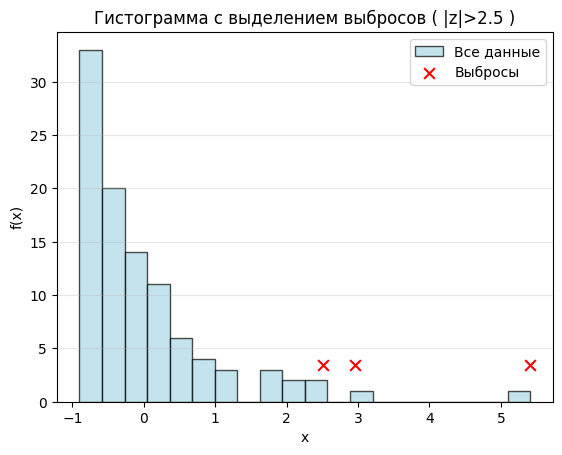

In [ ]:
plt.hist(z_expo, bins=20, color='lightblue', edgecolor='black', alpha=0.7, label='Все данные')
y_min, y_max = plt.ylim()
plt.scatter(vibros, [y_max / 10 for _ in range(len(vibros))], color='red', s=60, zorder=5, label='Выбросы', marker='x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Гистограмма с выделением выбросов ( |z|>2.5 )')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()


In [ ]:
mu = 10
sigma = 5

borders_sigma1 = [mu - sigma, mu + sigma]
borders_sigma15 = [mu - 1.5 * sigma, mu + 1.5 * sigma]

values_sigma1 = test_normal[(test_normal > borders_sigma1[0]) & (test_normal < borders_sigma1[1])]
values_sigma15 = test_normal[(test_normal > borders_sigma15[0]) & (test_normal < borders_sigma15[1])]

print(f"В пределах μ ± 1σ [{borders_sigma1[0]}, {borders_sigma1[1]}]: {len(values_sigma1)} элементов")
print(f"В пределах μ ± 1.5σ [{borders_sigma15[0]}, {borders_sigma15[1]}]: {len(values_sigma15)} элементов")
print(f"Разница: {len(values_sigma15) - len(values_sigma1)} элементов")


В пределах μ ± 1σ [5, 15]: 67 элементов
В пределах μ ± 1.5σ [2.5, 17.5]: 89 элементов
Разница: 22 элементов


In [ ]:
mean_normal = np.mean(test_normal)
mean_uni = np.mean(test)
n = 100
var_normal = sum((test_normal - mean_normal) ** 2) / n
var_uni = sum((test - mean_uni) ** 2) / n
cov = sum((test_normal - mean_normal) * (test - mean_uni)) / n
print(f'Дисперсия нормального распределения: {var_normal}')
print(f'Дисперсия равномерного распределения: {var_uni}')
print(f'Ковариация: {cov}')
print(f'Корреляцию Пирсона: {cov / (np.sqrt(var_normal) * np.sqrt(var_uni))}')


Дисперсия нормального распределения: 24.8176459499692
Дисперсия равномерного распределения: 2154.3885860966575
Ковариация: -19.037374669589635
Корреляцию Пирсона: -0.08233125682345713


In [ ]:
print(f'Дисперсия нормального распределения: {np.var(test_normal)}')
print(f'Дисперсия равномерного распределения: {np.var(test)}')
print(f'Ковариация: {np.cov(test_normal, test)[0, 1]}')
print(f'Корреляцию Пирсона: {np.corrcoef(test_normal, test)[0, 1]}')

Дисперсия нормального распределения: 24.817645949969204
Дисперсия равномерного распределения: 2154.3885860966575
Ковариация: -19.22967138342388
Корреляцию Пирсона: -0.08233125682345716


In [ ]:
import time

def triplets_for(arr, treshhold, window):
  seq = []
  indexes = []
  for i in range(len(arr) - window + 1):
    win_sum = sum(arr[i: i + window])
    if win_sum > treshhold:
      seq.append(arr[i: i + window])
      indexes.append(i)
  return seq, indexes

def triplets_numpy(arr, threshold, window):
    sums = np.convolve(arr, np.ones(window), mode='valid')
    mask = sums > threshold
    indexes = np.where(mask)[0]
    seq = np.array([arr[i:i+window] for i in indexes])
    return seq, indexes

start = time.time()
triplets_for, indexes_for = triplets_for(test, 30, 3)
time_for = time.time() - start

start = time.time()
triplets_np, indexes_np = triplets_numpy(test, 30, 3)
time_np = time.time() - start

print(f"Цикл for: {time_for:.4f} сек")
print(f"Методы NumPy: {time_np:.4f} сек")
print(f"Результаты совпадают: {np.allclose(np.sort(indexes_for), np.sort(indexes_np))}")



Цикл for: 0.0003 сек
Методы NumPy: 0.0003 сек
Результаты совпадают: True


In [ ]:
import pandas as pd

alpha = 0.2
ema = []
for i, x in enumerate(test_normal):
    if i == 0:
        ema.append(x)
    else:
        ema_t = alpha * x + (1 - alpha) * ema[-1]
        ema.append(ema_t)

ema = np.array(ema)
ema_pd = pd.Series(test_normal).ewm(alpha=alpha, adjust=False).mean().values

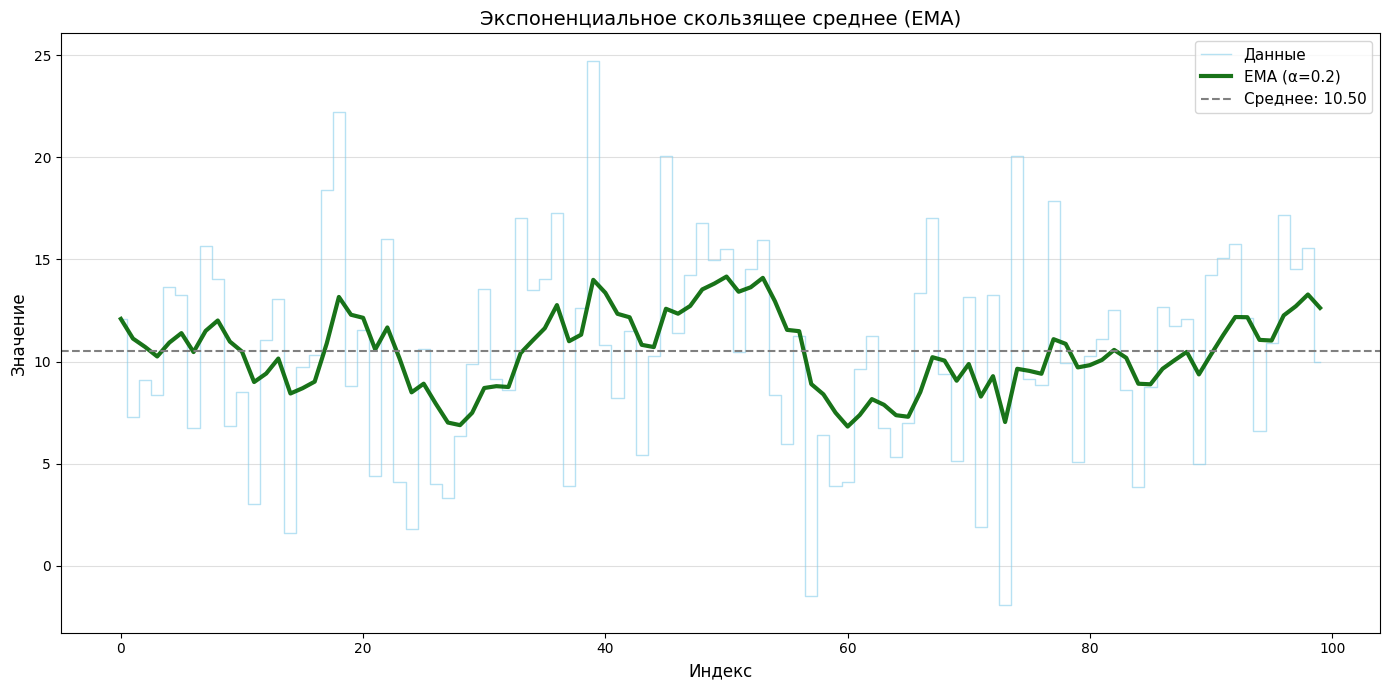

Разница между 'ручным' методом и библиотекой Pandas: 0.0000000000


In [ ]:

plt.figure(figsize=(14, 7))
plt.plot(test_normal, drawstyle='steps-mid', color='skyblue', alpha=0.6, linewidth=1, label='Данные')
plt.plot(ema, color='darkgreen', linewidth=3, label=f'EMA (α={alpha})', alpha=0.9)

mean_val = np.mean(test_normal)
plt.axhline(mean_val, color='gray', linestyle='--', linewidth=1.5, label=f'Среднее: {mean_val:.2f}')

plt.title('Экспоненциальное скользящее среднее (EMA)', fontsize=14)
plt.xlabel('Индекс', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, axis='y', alpha=0.4)
plt.tight_layout()
plt.show()
print(f"Разница между 'ручным' методом и библиотекой Pandas: {np.mean(np.abs(ema - ema_pd)):.10f}")




In [ ]:
re_normal_arr = test_normal.reshape(10, 10)

for x in re_normal_arr:
  for i in range(len(x)):
    if x[i] == min(x):
      x[i] = np.nan
      break

print(re_normal_arr)


[[12.08948868  7.27773035  9.08120898  8.38947975 13.63942081 13.25063198
          nan 15.64929967 14.04275477  6.84981416]
 [ 8.53559143  3.04137315 11.08114214 13.07962414         nan  9.72841559
  10.30756309 18.39946823 22.24142584  8.80987983]
 [11.54359416  4.39420714 15.98397094  4.13034641         nan 10.60949932
   4.0212067   3.33155204  6.3817586   9.90216038]
 [13.57279926  9.15578547  8.59467009 17.03854551 13.51465245 14.03802447
  17.29215993         nan 12.5995738  24.7338257 ]
 [10.8297532   8.22886297 11.49250067         nan 10.27517292 20.0833275
  11.38171256 14.2362938  16.77445013 14.96830094]
 [15.52830469 10.45031772 14.51779368 15.93856264  8.36673425  5.95656053
  11.23138486         nan  6.39205137  3.90801379]
 [        nan  9.64522167 11.27680137  6.77021845  5.3409221   6.99690776
  13.34900085 17.03656205  9.38578161  5.1191811 ]
 [13.15359554  1.91917532 13.27785671         nan 20.07098051  9.13914115
   8.84324309 17.86645793  9.95328249  5.10391701]
 

In [ ]:
### 2

from datetime import datetime, timedelta
import random

np.random.seed(42)
random.seed(42)
n_rows = 500
start_date = datetime.now() - timedelta(days=2*365)
end_date = datetime.now()

user_id = np.arange(1, n_rows + 1)
age = np.random.randint(18, 66, size=n_rows)
multiplier = np.random.normal(1.5, 0.2, size=n_rows)
income = (age * multiplier * 1000).round(2)
date_range = (end_date - start_date).days
subscription_date = [
    start_date + timedelta(days=random.randint(0, date_range))
    for _ in range(n_rows)]
regions = ["Север", "Юг", "Центр", "Восток", "Запад"]
region = np.random.choice(regions, size=n_rows)
is_active = np.random.choice([True, False], size=n_rows, p=[0.7, 0.3])

df = pd.DataFrame({
    'user_id': user_id,
    'age': age,
    'income': income,
    'subscription_date': subscription_date,
    'region': region,
    'is_active': is_active
})

print(df.head(10))
print()
df.info()
print()
df.describe()


---first 10 rows---
   user_id  age    income          subscription_date region  is_active
0        1   56  81732.48 2025-09-19 19:32:59.027622     Юг       True
1        2   46  69560.25 2024-03-28 19:32:59.027622  Север      False
2        3   32  52141.84 2023-12-30 19:32:59.027622  Запад      False
3        4   60  91513.14 2024-09-11 19:32:59.027622     Юг       True
4        5   25  28013.12 2024-08-11 19:32:59.027622     Юг      False
5        6   38  66732.11 2024-07-20 19:32:59.027622  Север       True
6        7   56  77110.50 2024-04-25 19:32:59.027622     Юг       True
7        8   36  69201.49 2024-03-18 19:32:59.027622  Запад       True
8        9   40  65494.79 2025-10-27 19:32:59.027622     Юг      False
9       10   28  42397.45 2025-06-15 19:32:59.027622  Запад       True
---info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             -----

,user_id,age,income,subscription_date
count,500.000000,500.000000,500.000000,500
mean,250.500000,41.980000,62923.141860,2024-11-21 06:26:44.627621632
min,1.000000,18.000000,21773.080000,2023-12-05 19:32:59.027622
25%,125.750000,31.000000,44323.495000,2024-05-16 19:32:59.027621888
50%,250.500000,43.000000,63662.375000,2024-11-06 19:32:59.027621888
75%,375.250000,53.000000,78638.385000,2025-06-06 19:32:59.027621888
max,500.000000,65.000000,129140.030000,2025-12-04 19:32:59.027622
std,144.481833,13.800598,22463.266745,NaN


In [ ]:
today = pd.Timestamp(datetime.now().year, datetime.now().month, 1)

df['experience_month'] = (
    (today.year - df['subscription_date'].dt.year) * 12 +
     (today.month - df['subscription_date'].dt.month)
)

df.head()

,user_id,age,income,subscription_date,region,is_active,experience_month
0,1,56,81732.48,2025-09-19 19:32:59.027622,Юг,True,3
1,2,46,69560.25,2024-03-28 19:32:59.027622,Север,False,21
2,3,32,52141.84,2023-12-30 19:32:59.027622,Запад,False,24
3,4,60,91513.14,2024-09-11 19:32:59.027622,Юг,True,15
4,5,25,28013.12,2024-08-11 19:32:59.027622,Юг,False,16


In [ ]:
df['income_group'] = pd.qcut(
    df['income'],
    q=4,
labels=['Низкий', 'Средний', 'Высокий', 'Очень высокий'])

df['loyalty_score'] = (df.income / (1 + df.experience_month))

df.head()



,user_id,age,income,subscription_date,region,is_active,experience_month,income_group,loyalty_score
0,1,56,81732.48,2025-09-19 19:32:59.027622,Юг,True,3,Очень высокий,20433.120000
1,2,46,69560.25,2024-03-28 19:32:59.027622,Север,False,21,Высокий,3161.829545
2,3,32,52141.84,2023-12-30 19:32:59.027622,Запад,False,24,Средний,2085.673600
3,4,60,91513.14,2024-09-11 19:32:59.027622,Юг,True,15,Очень высокий,5719.571250
4,5,25,28013.12,2024-08-11 19:32:59.027622,Юг,False,16,Низкий,1647.830588


In [ ]:
mean_income_by_region = (
    df[df['is_active'] == True]
    .groupby('region')['income']
    .mean()
    .round(3)
)

mean_income_by_region

,income
region,
Восток,58814.496
Запад,65717.064
Север,65477.647
Центр,64341.211
Юг,63894.326


In [ ]:
mean_loyalty_score = (
    df.groupby(['region', 'income_group'], observed = False)['loyalty_score']
    .mean()
    .round(3)
)

mean_loyalty_score

region  income_group 
Восток  Низкий            2877.325
        Средний           8350.721
        Высокий           8157.616
        Очень высокий    11525.236
Запад   Низкий            2827.066
        Средний           4652.551
        Высокий           6935.787
        Очень высокий     9870.163
Север   Низкий            3369.141
        Средний           5572.467
        Высокий           8631.184
        Очень высокий    12474.629
Центр   Низкий            3583.044
        Средний           6850.013
        Высокий           8681.904
        Очень высокий    12184.744
Юг      Низкий            3729.672
        Средний           7952.094
        Высокий          10514.619
        Очень высокий     9791.643
Name: loyalty_score, dtype: float64

In [ ]:
high_loyalty_score = (
    df.sort_values('loyalty_score', ascending=False).head(int(0.05 * len(df)))
)

high_loyalty_score[['user_id', 'loyalty_score']]

,user_id,loyalty_score
210,211,68442.650000
450,451,46988.150000
232,233,43364.205000
24,25,40258.685000
152,153,39863.275000
428,429,35628.490000
354,355,35079.436667
308,309,35063.025000
347,348,34780.506667
81,82,32237.315000


In [ ]:
mean_income_by_region = (
    df.groupby('region')['income'].mean().round(3)
)

region_income_mean = mean_income_by_region.to_dict()

for i in range(int(0.05 * len(df))):
  random_row = np.random.randint(0, len(df))
  df.loc[random_row, 'income'] = np.nan

missing_mask = df['income'].isna()
df.loc[missing_mask, 'income'] = df.loc[missing_mask, 'region'].map(region_income_mean)


In [ ]:
for i in range(int(0.05 * len(df))):
  random_row = np.random.randint(0, len(df))
  df.loc[random_row, 'income'] = np.nan

df_time = df.set_index('subscription_date').sort_index()

print("До интерполяции пропусков в income:", df_time['income'].isna().sum())
df_time['income'] = df_time['income'].interpolate(method='time')
df = df_time.reset_index()

print("После интерполяции пропусков в income:", df['income'].isna().sum())


До интерполяции пропусков в income: 25
После интерполяции пропусков в income: 0


In [ ]:
def validate_data(df):
    issues = []
    if df['age'].min() < 0:
        issues.append("age: обнаружены отрицательные значения")
    if (df['income'] < 0).any():
        issues.append("income: обнаружены отрицательные значения")
    return issues

errors = validate_data(df)
if errors:
    print("Найдены проблемы:")
    for e in errors:
        print(f"  - {e}")
else: print("Все данные корректны")


Все данные корректны


In [ ]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
n_dups_before = diamonds.duplicated().sum()

print(f'Кол-во дубликатов до: {n_dups_before}')
print(f'Кол-во пропусков по столбцам:\n{diamonds.isnull().sum()}')

if n_dups_before > 0:
    diamonds_clean = diamonds.drop_duplicates(keep='first')
    n_dups_after = diamonds_clean.duplicated().sum()
    print(f'Кол-во дубликатов после: {n_dups_after}')
    print(f"Размер до: {diamonds.shape}, после: {diamonds_clean.shape}")
else:
    diamonds_clean = diamonds.copy()
    print("Дубликатов нет")


Кол-во дубликатов до: 146
Кол-во пропусков по столбцам:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
Кол-во дубликатов после: 0
Размер до: (53940, 10), после: (53794, 10)


In [ ]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=cut_order, ordered=True)
diamonds['color'] = pd.Categorical(diamonds['color'], categories=color_order, ordered=True)
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=clarity_order, ordered=True)
diamonds['cut'] = diamonds['cut'].cat.codes + 1
diamonds['color'] = diamonds['color'].cat.codes + 1
diamonds['clarity'] = diamonds['clarity'].cat.codes + 1

print(diamonds.head(10))

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75
5   0.24    3      1        6   62.8   57.0    336  3.94  3.96  2.48
6   0.24    3      2        7   62.3   57.0    336  3.95  3.98  2.47
7   0.26    3      3        3   61.9   55.0    337  4.07  4.11  2.53
8   0.22    1      6        4   65.1   61.0    337  3.87  3.78  2.49
9   0.23    3      3        5   59.4   61.0    338  4.00  4.05  2.39


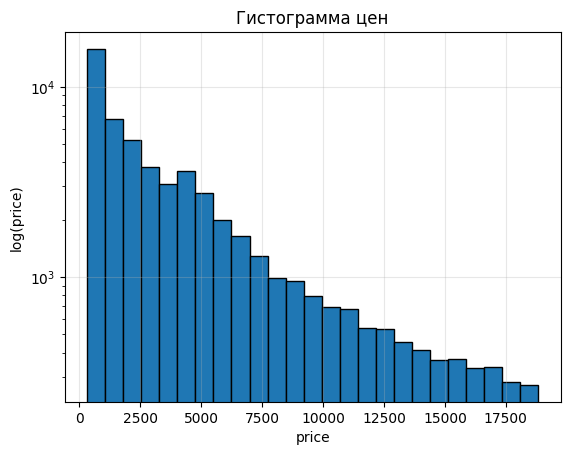

In [ ]:
plt.hist(diamonds['price'], bins=25, edgecolor='black')
plt.yscale('log')
plt.title('Гистограмма цен')
plt.xlabel('price')
plt.ylabel('log(price)')
plt.grid(True, alpha=0.3)
plt.show()

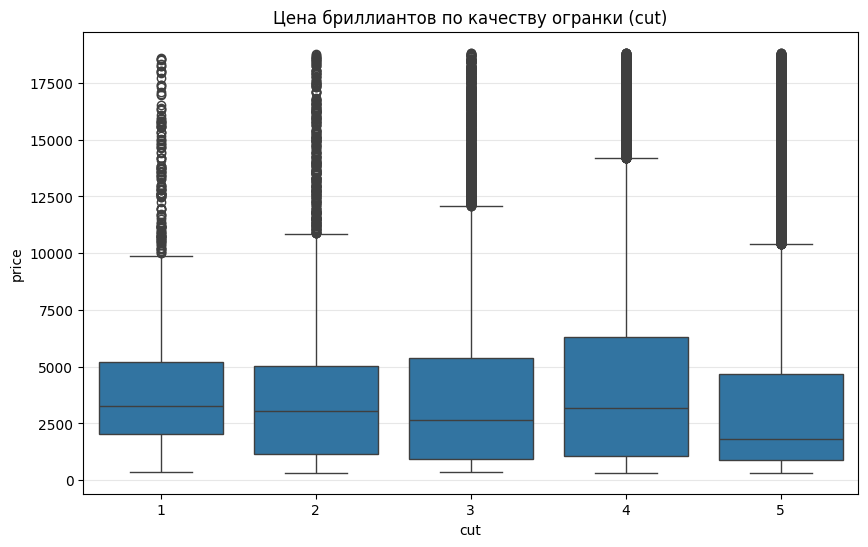

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamonds, x='cut', y='price')
plt.title('Цена бриллиантов по качеству огранки (cut)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()


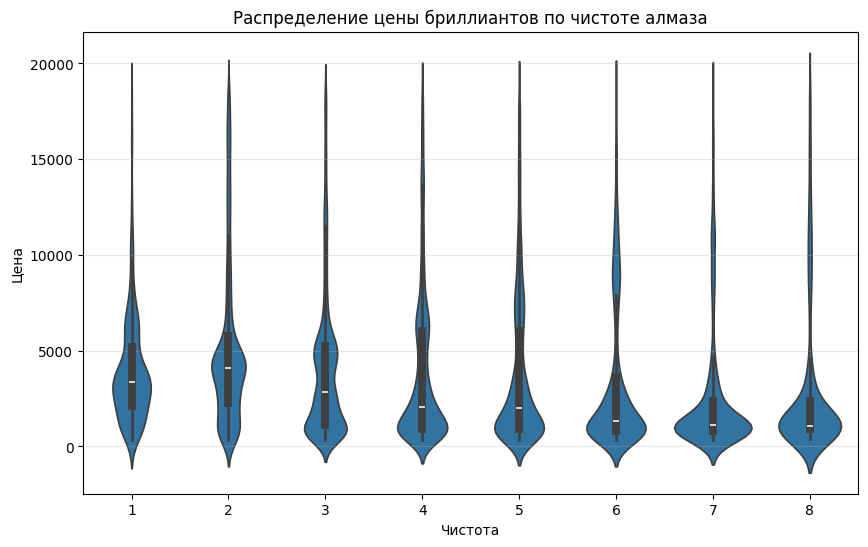

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=diamonds, x='clarity', y='price')
plt.title('Распределение цены бриллиантов по чистоте алмаза')
plt.ylabel('Цена')
plt.xlabel('Чистота')
plt.grid(True, axis='y', alpha=0.3)
plt.show()


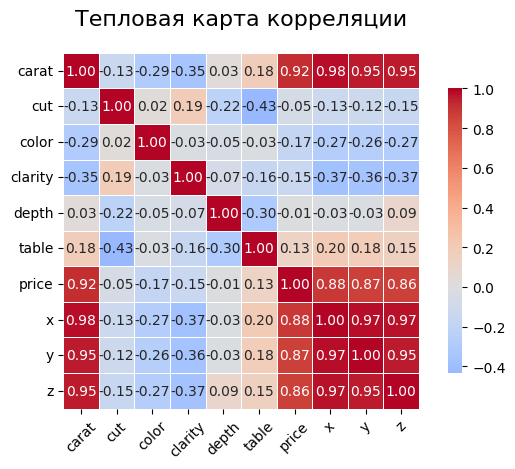

In [ ]:
numeric_cols = diamonds.select_dtypes(include=['float64', 'int64', 'int8'])
corr_matrix = numeric_cols.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Тепловая карта корреляции', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


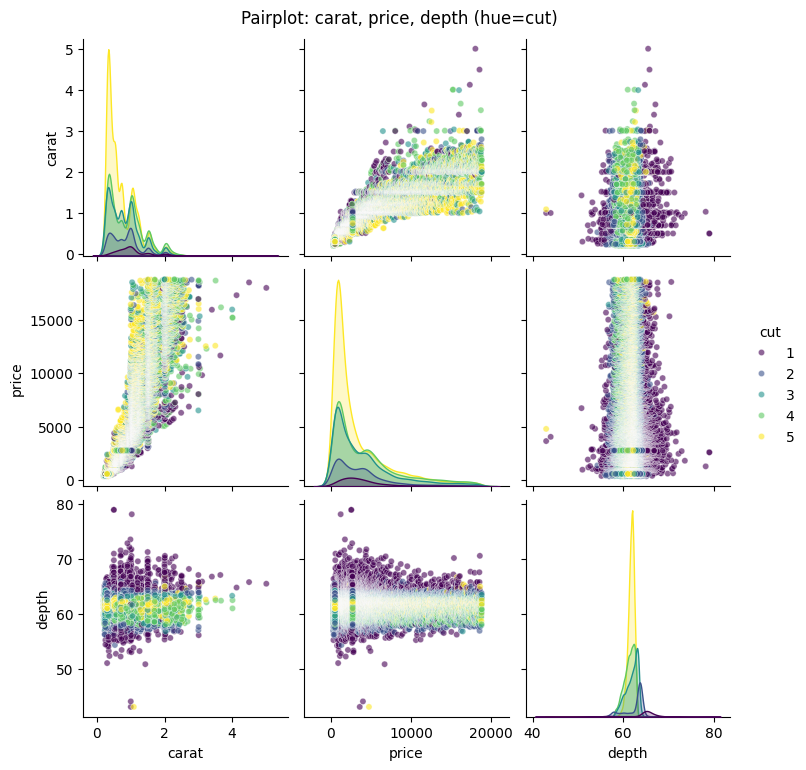

In [ ]:
sns.pairplot(
    diamonds,
    vars=['carat', 'price', 'depth'],
    hue='cut',
    palette='viridis',
    plot_kws={'alpha': 0.6, 's': 20},
    diag_kind='kde'
)

plt.suptitle('Pairplot: carat, price, depth (hue=cut)', y=1.02)
plt.show()


In [ ]:
pivot_table = diamonds.pivot_table(
    values='price',
    index='cut',
    columns='color',
    aggfunc='mean',
    fill_value=0
).round(2)

print(pivot_table)


color        1        2        3        4        5        6        7
cut                                                                 
1      4975.66  4685.45  5135.68  4239.25  3827.00  3682.31  4291.06
2      4574.17  5078.53  4276.25  4123.48  3495.75  3423.64  3405.38
3      5103.51  5255.88  4535.39  3872.75  3778.82  3214.65  3470.47
4      6294.59  5946.18  5216.71  4500.74  4324.89  3538.91  3631.29
5      4918.19  4451.97  3889.33  3720.71  3374.94  2597.55  2629.09


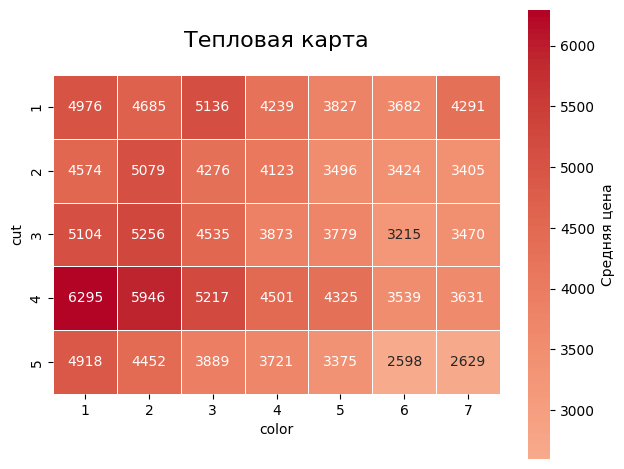

In [ ]:
sns.heatmap(
    pivot_table,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.0f',
    linewidths=0.5,
    cbar_kws={'label': 'Средняя цена'}
)
plt.title('Тепловая карта', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [ ]:
def sliding_window(x, w, step):
    if w < 0 or step < 0:
        print("w и step должны быть больше нуля")
        return
    if w > len(x):
        print("Размер окна не может превышать длину массива")
        return
    n_win = (len(x) - w) // step + 1
    A = np.zeros((n_win, w), dtype=x.dtype)
    for i in range(n_win):
       A[i, :] = x[(i * step):(i * step + w)]
    return A

window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
[1, 4, 5],
[4, 5, -2],
[5, -2, 5],
[-2, 5, 9],
[5, 9, 0]])
print(np.array_equal(sliding_window(x1, w=window,
step=step_s),A1))
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
[-6, 5],
[10, 11]])
print(np.array_equal(sliding_window(x2, w=window,
step=step_s),A2))


True
True
